# Assignment 1: Wrangling and EDA
### Foundations of Machine Learning

Question 1

In [1]:
import os
os.getcwd()


'/content'

In [2]:
!wget https://raw.githubusercontent.com/ds4e/undergrad_ml_assignments/main/get_data.py


--2026-02-05 01:36:28--  https://raw.githubusercontent.com/ds4e/undergrad_ml_assignments/main/get_data.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772 [text/plain]
Saving to: ‘get_data.py’

get_data.py         100%[===================>]     772  --.-KB/s    in 0s      

2026-02-05 01:36:28 (23.9 MB/s) - ‘get_data.py’ saved [772/772]



In [3]:
from get_data import download_data

data_dir = download_data()
data_dir


Download complete
Extracting data files...
Data extracted


'./data'

In [4]:
import os
os.listdir("data")


['zoo.csv',
 'divorce',
 'Effectiveness of Bystander Cardiopulmonary Resuscitation and Survival Following Out-of-Hospital Cardiac Arrest.pdf',
 'craigslist_cville_cars.csv',
 'weapons-trade-register.csv',
 'us_power_consumption.csv',
 'nhanes_meta_17_18.csv',
 '2022 election cycle fundraising.csv',
 'SIPRI Military Expenditure Database.csv',
 'nhanes_data_17_18.csv',
 'mammogram.txt',
 'craiglist_cville_cars_long.csv',
 'USA_cars_datasets.csv',
 'use_of_force.txt',
 'cars_env.csv',
 'ames_codebook.txt',
 'pretrial_data.csv',
 'sharks.csv',
 'mn_police_use_of_force.csv',
 'corporate_ratings.csv',
 'iowa.csv',
 'energy.csv',
 'pierce_county_house_sales.csv',
 'airbnb_NYC.csv',
 'wages_hw.csv',
 'tech_stocks.csv',
 'heart_failure_readme.txt',
 'crimebystatecombinedwithunemployment.csv',
 'VirginiaPretrialData2017Codebook.pdf',
 'heart_failure_clinical_records_dataset.csv',
 'justice_data.parquet',
 'patents.csv',
 'tuna.csv',
 'time_use.csv',
 'land_mines.csv',
 'drilling_rigs.csv',
 'cvi

In [5]:
import os
os.listdir("data")


['zoo.csv',
 'divorce',
 'Effectiveness of Bystander Cardiopulmonary Resuscitation and Survival Following Out-of-Hospital Cardiac Arrest.pdf',
 'craigslist_cville_cars.csv',
 'weapons-trade-register.csv',
 'us_power_consumption.csv',
 'nhanes_meta_17_18.csv',
 '2022 election cycle fundraising.csv',
 'SIPRI Military Expenditure Database.csv',
 'nhanes_data_17_18.csv',
 'mammogram.txt',
 'craiglist_cville_cars_long.csv',
 'USA_cars_datasets.csv',
 'use_of_force.txt',
 'cars_env.csv',
 'ames_codebook.txt',
 'pretrial_data.csv',
 'sharks.csv',
 'mn_police_use_of_force.csv',
 'corporate_ratings.csv',
 'iowa.csv',
 'energy.csv',
 'pierce_county_house_sales.csv',
 'airbnb_NYC.csv',
 'wages_hw.csv',
 'tech_stocks.csv',
 'heart_failure_readme.txt',
 'crimebystatecombinedwithunemployment.csv',
 'VirginiaPretrialData2017Codebook.pdf',
 'heart_failure_clinical_records_dataset.csv',
 'justice_data.parquet',
 'patents.csv',
 'tuna.csv',
 'time_use.csv',
 'land_mines.csv',
 'drilling_rigs.csv',
 'cvi

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `airbnb_NYC.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)



2. Categorical variable: For the Minnesota police use of for data, `mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? For the remaining missing values, replace the `np.nan/None` values with the label `Missing`.
3. Dummy variable: For `metabric.csv`, convert the `Overall Survival Status` variable into a dummy/binary variable, taking the value 0 if the patient is deceased and 1 if they are living.
4. Missing values: For `airbnb_NYC.csv`, determine how many missing values of `Review Scores Rating` there are. Create a new variable, in which you impute the median score for non-missing observations to the missing ones. Why might this bias or otherwise negatively impact your results?

Q 1.1

In [13]:
airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin-1")
airbnb["Price"].head()


,Price
0,145
1,37
2,28
3,199
4,549


In [14]:
import pandas as pd
import numpy as np

airbnb = pd.read_csv("data/airbnb_NYC.csv", encoding="latin-1")
airbnb["Price"].head()


,Price
0,145
1,37
2,28
3,199
4,549


In [18]:
airbnb["Price_clean"] = (
    airbnb["Price"]
    .str.replace("$", "", regex=False)
    .str.replace(",", "", regex=False)
)

airbnb["Price_clean"] = pd.to_numeric(
    airbnb["Price_clean"],
    errors="coerce"
)


In [19]:
airbnb["Price_clean"].isna().sum()


np.int64(0)

Once I removed the dollar signs, the Price variable and converting numeric format, there were 0 missing values. Cleaning these formatting issues prior to manipulation ensured that all prices were converted.

Q1.2

In [22]:
import pandas as pd
import numpy as np

mn = pd.read_csv("data/mn_police_use_of_force.csv", encoding="latin-1")


In [23]:
mn["subject_injury"].value_counts(dropna=False)


,count
subject_injury,
NaN,9848
Yes,1631
No,1446


In [48]:
mn["subject_injury_clean"] = (
    mn["subject_injury_clean"]
    .astype(str)
    .str.lower()
)



In [51]:
mn.loc[mn["subject_injury_clean"] == "yes", "subject_injury_clean"] = "Yes"
mn.loc[mn["subject_injury_clean"] == "no", "subject_injury_clean"] = "No"



In [52]:
mn.loc[mn["subject_injury"].isna(), "subject_injury_clean"] = np.nan


In [53]:
mn["subject_injury_clean"].value_counts(dropna=False)


,count
subject_injury_clean,
NaN,9848
Yes,1631
No,1446


In [54]:
mn["subject_injury_clean"].isna().mean()


np.float64(0.7619342359767892)

In [55]:
mn["subject_injury_clean"].value_counts()


,count
subject_injury_clean,
Yes,1631
No,1446


The subject_injury variable was cleaned into a categorical variable indicating whether a subject was injured (“Yes”) or not (“No”). From the cross-tabulation, it shows that missing injury data are more common for certain force types, showing the missingness is not random. Any remaining missing values were recoded as “Missing” to retain that information.

Q1.3

In [56]:
import pandas as pd
import numpy as np

meta = pd.read_csv("data/metabric.csv", encoding="latin-1")


In [57]:
meta["Overall Survival Status"].value_counts()


,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


In [62]:
meta["survival_dummy"] = np.where(
    meta["Overall Survival Status"] == "Living",
    1,
    0
)


In [63]:
meta["Overall Survival Status"].value_counts(dropna=False)



,count
Overall Survival Status,
1:DECEASED,768
0:LIVING,575


The Overall Survival Status variable was converted into a binary variable: 1 indicates the patient is living, 0 indicates the patient is deceased. This matches the slide recommendation for binary variables and simplifies analysis.

Q 1.4

In [65]:

missing_count = airbnb["Review Scores Rating"].isna().sum()
missing_count


np.int64(8323)

In [66]:

median_rating = airbnb["Review Scores Rating"].median()


airbnb["Review Scores Rating_imputed"] = airbnb["Review Scores Rating"].fillna(median_rating)

airbnb["Review Scores Rating_imputed"].isna().sum()


np.int64(0)

Replacing missing ratings with the median makes the dataset complete, but it could mess with results if the missing reviews aren’t random. It basically assumes missing listings are average, which might not be true.

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work. What does work?

2. Drop any columns that do not contain data.
3. What is an observation? Carefully justify your answer, and explain how it affects your choices in cleaning and analyzing the data.
4. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
5. Clean the Age variable and make a histogram of the ages of the victims.
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Thoughts?

Q 2

In [76]:
from google.colab import files

uploaded = files.upload()






Saving GSAF5.xls to GSAF5.xls


In [77]:
list(uploaded.keys())


['GSAF5.xls']

In [87]:
import pandas as pd

filename = "GSAF5.xls"
sharks = pd.read_excel(filename)
sharks.head()





,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
sharks = sharks.dropna(axis=1, how='all')
sharks.head()


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,29th January,2026.0,Unprovoked,Brazil,Recife,Del Chifre Beach in Olinda,Swimming,Deivson Rocha Dantas,M,13,...,Unknown bull and tiger sharks frequent the area,Kevin McMurray Trackingsharks.com: TV Globo: P...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,29th January,2026.0,Unprovoked,Australia,NSW,Angels Beach East Ballina,Surfing,Unnamed man,M,?,...,Unknown,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24th January,2026.0,Unprovoked,Australia,Tasmania,Cooee Beach west of Burnie,Swimming,Megan Stokes,F,?,...,1.7m Seven Gill shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20th January,2026.0,Unprovoked,Australia,NSW,Point Plomber North of Port Macquarie,Surfing,Paul Zvirdinas,M,39,...,Bull shark,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19th January,2026.0,Unprovoked,Australia,NSW,Dee Why,Surfing,Unknown,M,11,...,Bull shark,Andy Currie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Q 2.3 One thing to be aware of in the cleaning process is that since one row represents one attack, I have to be sure to preserve the rows and the content/information of the attack.

In [89]:

sharks['Year'] = pd.to_numeric(sharks['Year'], errors='coerce')

print(sharks['Year'].min(), sharks['Year'].max())

sharks = sharks[sharks['Year'] >= 1940]


0.0 2026.0


<Axes: title={'center': 'Shark Attacks Since 1940'}, xlabel='Year'>

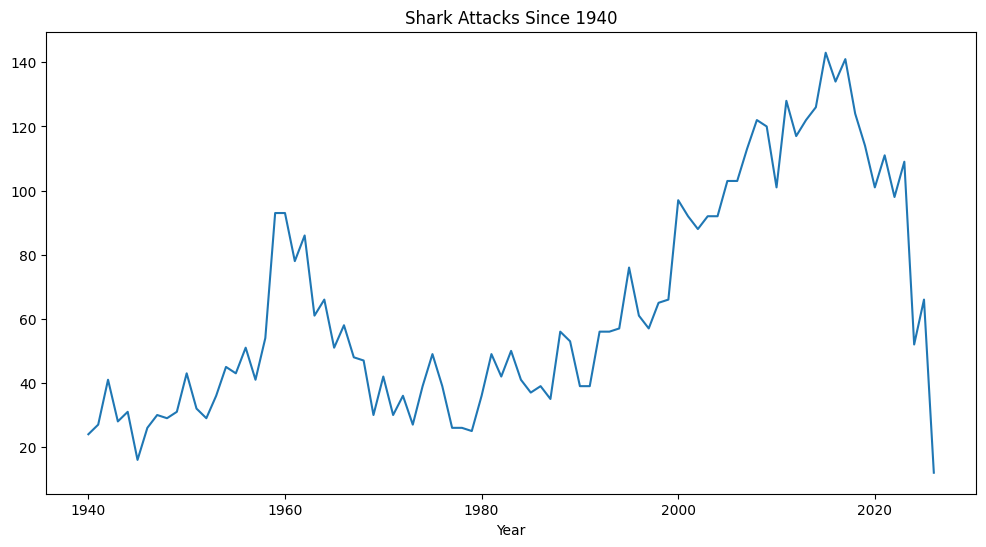

In [90]:
attacks_per_year = sharks.groupby('Year').size()
attacks_per_year.plot(kind='line', figsize=(12,6), title="Shark Attacks Since 1940")



<Axes: >

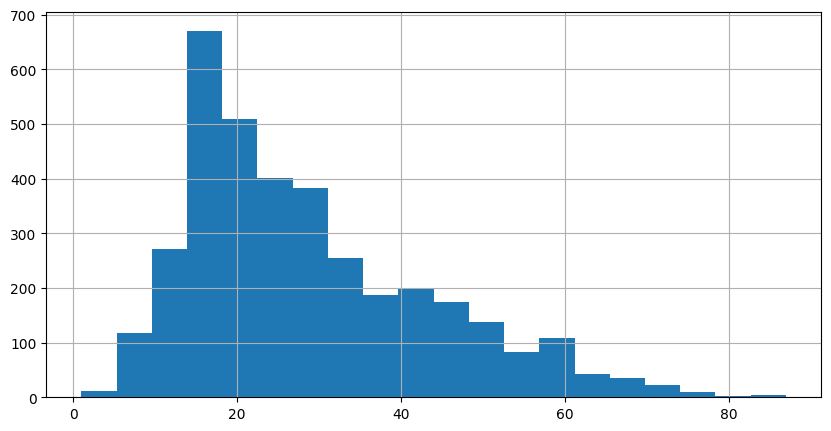

In [91]:

sharks['Age'] = pd.to_numeric(sharks['Age'], errors='coerce')

sharks['Age'].hist(bins=20, figsize=(10,5))


In [94]:
sharks['Type'] = sharks['Type'].str.strip().str.capitalize()
valid_types = ['Provoked', 'Unprovoked']
sharks['Type'] = sharks['Type'].apply(lambda x: x if x in valid_types else 'Unknown')

unprovoked_prop = (sharks['Type'] == 'Unprovoked').mean()
print("Proportion of unprovoked attacks:", unprovoked_prop)



Proportion of unprovoked attacks: 0.7450343084145901


In [97]:
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].str.strip().str.upper()
sharks['Fatal Y/N'] = sharks['Fatal Y/N'].apply(lambda x: x if x in ['Y','N'] else 'Unknown')



In [98]:
fatal_by_type = sharks.groupby('Type')['Fatal Y/N'].value_counts(normalize=True).unstack()
print(fatal_by_type)

Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.957935  0.017208  0.024857
Unknown     0.411699  0.449944  0.138358
Unprovoked  0.818953  0.012845  0.168202


NameError: name 'plt' is not defined

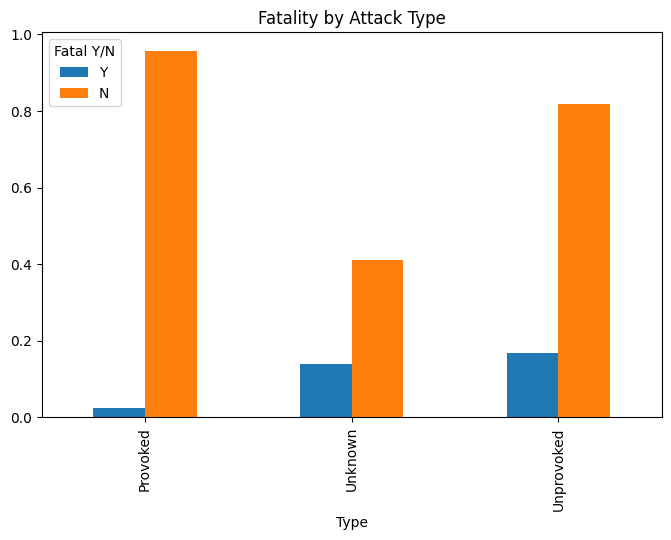

In [101]:
fatal_by_type[['Y','N']].plot(kind='bar', figsize=(8,5), title="Fatality by Attack Type")
plt.ylabel("Proportion")
plt.show()


Based on the graph, unprovoked attacks are more likely to be fatal in comparison to provoked attacks. Whereas, provoked attacks in general as less likely to be fatal-possibly because of controlled environments or closer to aid.

**Q3.** Open the "tidy_data.pdf" document available in `https://github.com/ds4e/wrangling`, which is a paper called *Tidy Data* by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?

1. Outlines how and why data tidying is crucial to future use of data- whether that be manipulation or visualizations.
2. It is meant to introduce and highlight the use and concept of "tidy data." Outlining use, benefit and context.
3. Tidy datasets means that the structures have been cleaned are a simarly organized. Meanwhile, messy datasets are all messy in their own unique way- there is often no common "messiness" bewteen them all. The second sentence means that observations and variables can play multiple roles, therefore dont have a general definition/use in every situation or case.
4. Values are single data points/entries in number/string form where one variable is one observation. A variable holds the specific kind of information that is being measured. An observation is a form of measurement that turns variables into one meaning.
5. Tiny data is where each variable forms a column, each observation forms a row, and earch type of observational unit forms a table.
6. The five common issues with messy datasets are the following: column headers are values, not variable names. Multiple variables are stored in one column. Variables are stored in both rows and columns. Multiple types of observational units are stored in the same table. A single observational unit is stored in multiple tables. I think the reason that table 4 is messy is because one variable is stored across multiple columns which isn't good.
7. I think 12 is considered tidy rather than 11 because each variable is organized in a column and each observation is a row. Whereas table 11 variables are across many columns.

**Q4.** This question looks at financial transfers from international actors to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going?

For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
5. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.
6. Which giftors provide the most money, in total?

Q4

In [2]:


from google.colab import files
uploaded = files.upload()

Saving college_completion.csv to college_completion.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


csv_filename = list(uploaded.keys())[0]
print("Loaded file:", csv_filename)
data = pd.read_csv(csv_filename, dtype=str)
data.head()

Loaded file: college_completion.csv


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0,0,0,0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351


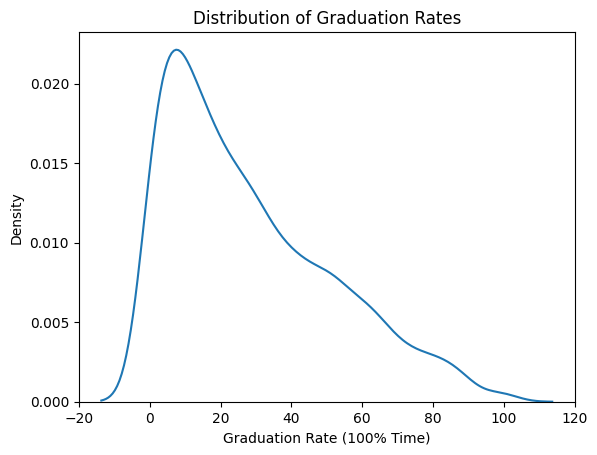

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [5]:
import seaborn as sns

data["grad_100_value"] = pd.to_numeric(
    data["grad_100_value"],
    errors="coerce"
)

data["grad_100_value"].dtype

sns.kdeplot(data["grad_100_value"].dropna())
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Distribution of Graduation Rates")
plt.show()

data["grad_100_value"].describe()

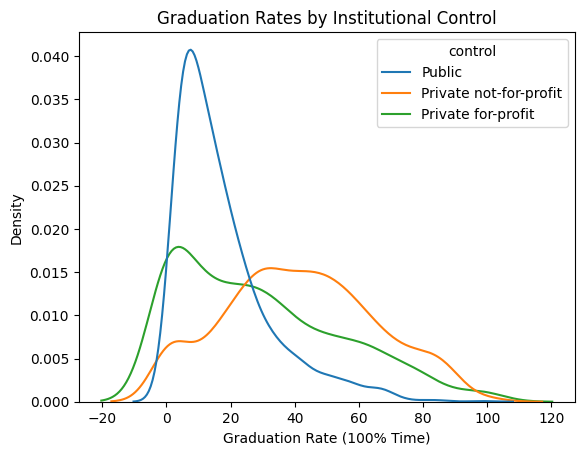

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [6]:
sns.kdeplot(data=data, x="grad_100_value", hue="control", common_norm=False)
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Graduation Rates by Institutional Control")
plt.show()
data.groupby("control")["grad_100_value"].describe()

In [7]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()

Download complete
Extracting data files...
Data extracted


In [8]:
df = pd.read_csv("data/ForeignGifts_edu.csv")

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28221 entries, 0 to 28220
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          28221 non-null  int64 
 1   OPEID                       28221 non-null  int64 
 2   Institution Name            28221 non-null  object
 3   City                        28221 non-null  object
 4   State                       28221 non-null  object
 5   Foreign Gift Received Date  28221 non-null  int64 
 6   Foreign Gift Amount         28221 non-null  int64 
 7   Gift Type                   28221 non-null  object
 8   Country of Giftor           28221 non-null  object
 9   Giftor Name                 24470 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.2+ MB


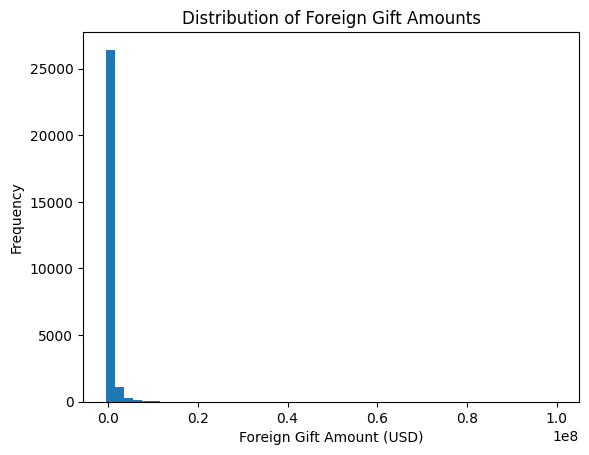

In [9]:
plt.figure()
plt.hist(df["Foreign Gift Amount"], bins=50)
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Frequency")
plt.title("Distribution of Foreign Gift Amounts")
plt.show()

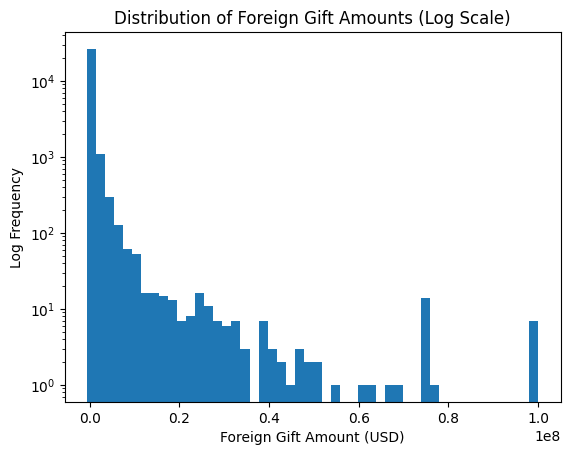

In [10]:
plt.figure()
plt.hist(df["Foreign Gift Amount"], bins=50)
plt.yscale("log")
plt.xlabel("Foreign Gift Amount (USD)")
plt.ylabel("Log Frequency")
plt.title("Distribution of Foreign Gift Amounts (Log Scale)")
plt.show()


The distribution is right-skewed, so most foreign gifts are small and only a few are very large. This means a small number of donations account for most of the total funding.

In [11]:
gift_type_counts = df["Gift Type"].value_counts()
gift_type_props = df["Gift Type"].value_counts(normalize=True)

gift_type_counts
gift_type_props

,proportion
Gift Type,
Contract,0.612097
Monetary Gift,0.387513
Real Estate,0.000390


Contract gifts make up the majority of foreign contributions, accounting for approximately 61.2% of all gifts. Monetary gifts follow with about 38.75%, while real estate gifts represent around 0.04% of the total number of gifts.

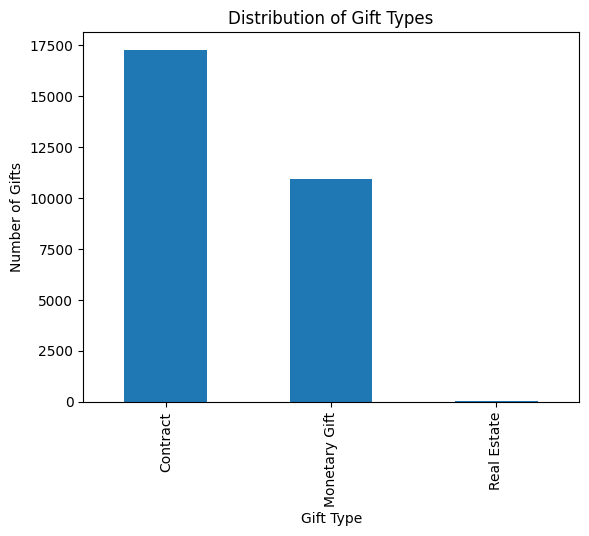

In [12]:
gift_type_counts.plot(kind="bar")
plt.xlabel("Gift Type")
plt.ylabel("Number of Gifts")
plt.title("Distribution of Gift Types")
plt.show()

In [13]:
top15_countries_count = (
    df.groupby("Country of Giftor")
      .count()["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)
top15_countries_count

,Foreign Gift Amount
Country of Giftor,
ENGLAND,3655
CHINA,2461
CANADA,2344
JAPAN,1896
SWITZERLAND,1676
SAUDI ARABIA,1610
FRANCE,1437
GERMANY,1394
HONG KONG,1080


In [14]:
top15_countries_amount = (
    df.groupby("Country of Giftor")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)
top15_countries_amount

,Foreign Gift Amount
Country of Giftor,
QATAR,2706240869
ENGLAND,1464906771
CHINA,1237952112
SAUDI ARABIA,1065205930
BERMUDA,899593972
CANADA,898160656
HONG KONG,887402529
JAPAN,655954776
SWITZERLAND,619899445


England gives the most gifts by number, but it is not the biggest donor by total money. For example, Qatar gives far fewer gifts than England, yet donates over $2.7 billion overall. This shows that some countries give many smaller gifts, while others give fewer gifts but contribute much more money.

In [15]:
top15_institutions = (
    df.groupby("Institution Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)
top15_institutions

,Foreign Gift Amount
Institution Name,
Carnegie Mellon University,1477922504
Cornell University,1289937761
Harvard University,954803610
Massachusetts Institute of Technology,859071692
Yale University,613441311
Texas A&M University,521455050
Johns Hopkins University,502409595
Northwestern University,402316221
Georgetown University,379950511


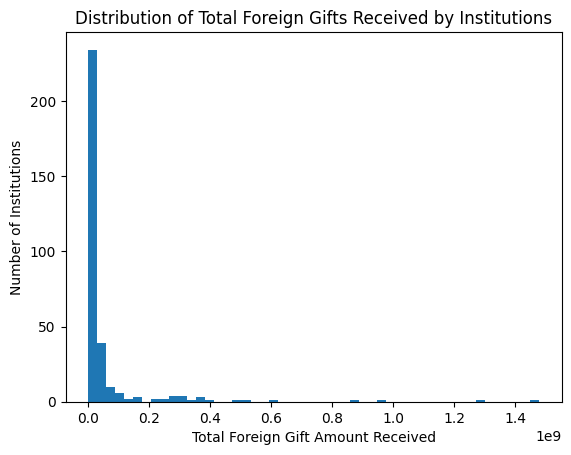

In [16]:
institution_totals = (
    df.groupby("Institution Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
)

plt.figure()
plt.hist(institution_totals, bins=50)
plt.xlabel("Total Foreign Gift Amount Received")
plt.ylabel("Number of Institutions")
plt.title("Distribution of Total Foreign Gifts Received by Institutions")
plt.show()

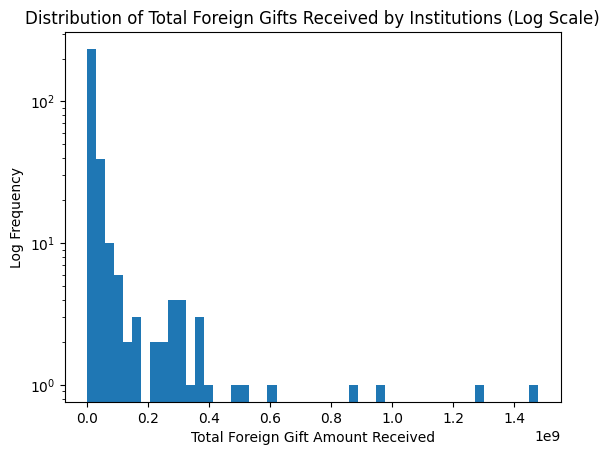

In [17]:
plt.figure()
plt.hist(institution_totals, bins=50)
plt.yscale("log")
plt.xlabel("Total Foreign Gift Amount Received")
plt.ylabel("Log Frequency")
plt.title("Distribution of Total Foreign Gifts Received by Institutions (Log Scale)")
plt.show()

The top 15 institutions in terms of the total amount of money they receive are Carnegie Mellon University, Cornell University, Harvard University, Massachusetts Institute of Technology, Yale University, Texas A&M University, Johns Hopkins University, Northwestern University, Georgetown, The University, University of Chicago, University of Colorado Boulder, Duke University, Brigham Young University, Stanford University, and the University of Texas MD Anderson Cancer Center.

The histogram shows that the distribution of total foreign gift amounts across institutions is very skewed. A small number of universities receive very large sums of foreign funding, while most institutions receive smaller amounts.

In [18]:
top15_giftors = (
    df.groupby("Giftor Name")
      .sum(numeric_only=True)["Foreign Gift Amount"]
      .sort_values(ascending=False)
      .head(15)
)
top15_giftors

,Foreign Gift Amount
Giftor Name,
Qatar Foundation,1166503744
Qatar Foundation/Qatar National Res,796197000
Qatar Foundation for Education,373945215
Anonymous,338793629
Saudi Arabian Cultural Mission,275221475
HCL,190000000
Church of Jesus Christ of LDS,185203715
Emirates Institute for Advanced Sc,170641244
QIC,148355497


The giftors listed above are the ones that give the most money overall, with the Qatar Foundation giving about $1.17 billion. This table focuses on individual giftors rather than countries, which is why multiple Qatar-based foundations and organizations appear more than once.

**Q5.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `college_completion.csv` dataset from the US Department of Education. The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `college_completion.csv` data with Pandas.
2. How many observations and variables are in the data? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see in words.
4. For `grad_100_value`, create a kernel density plot and describe table. Now condition on `control`, and produce a kernel density plot and describe tables for each type of institutional control. Which type of institution appear to have the most favorable graduation rates?
5. Make a scatterplot of `grad_100_value` by `aid_value`, and compute the covariance and correlation between the two variables. Describe what you see. Now make the same plot and statistics, but conditioning on `control`. Describe what you see. For which kinds of institutions does aid seem to vary positively with graduation rates?

Q5

In [5]:
from google.colab import files
uploaded = files.upload()

Saving college_completion.csv to college_completion (1).csv


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_filename = list(uploaded.keys())[0]
print("file name: ", csv_filename)

df = pd.read_csv(csv_filename, dtype=str)

df.head()

file name:  college_completion (1).csv


,index,unitid,chronname,city,state,level,control,basic,hbcu,flagship,...,vsa_grad_after6_transfer,vsa_grad_elsewhere_after6_transfer,vsa_enroll_after6_transfer,vsa_enroll_elsewhere_after6_transfer,similar,state_sector_ct,carnegie_ct,counted_pct,nicknames,cohort_size
0,0,100654,Alabama A&M University,Normal,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,36.4,5.6,17.2,11.1,232937|100724|405997|113607|139533|144005|2285...,13,386,99.7|07,NaN,882
1,1,100663,University of Alabama at Birmingham,Birmingham,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,NaN,NaN,NaN,NaN,196060|180461|201885|145600|209542|236939|1268...,13,106,56.0|07,UAB,1376
2,2,100690,Amridge University,Montgomery,Alabama,4-year,Private not-for-profit,Baccalaureate Colleges--Arts & Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,217925|441511|205124|247825|197647|221856|1353...,16,252,100.0|07,NaN,3
3,3,100706,University of Alabama at Huntsville,Huntsville,Alabama,4-year,Public,Research Universities--very high research acti...,NaN,NaN,...,0,0,0,0,232186|133881|196103|196413|207388|171128|1900...,13,106,43.1|07,UAH,759
4,4,100724,Alabama State University,Montgomery,Alabama,4-year,Public,Masters Colleges and Universities--larger prog...,X,NaN,...,NaN,NaN,NaN,NaN,100654|232937|242617|243197|144005|241739|2354...,13,386,88.0|07,ASU,1351


In [8]:
df.shape

(3798, 63)

Here, there are 3798 observations and there are 63 variables included in this table. Examining the first few rows confirms that the data are structured at the highest level.

In [13]:
pd.crosstab(df["control"], df["level"])

level,2-year,4-year
control,,
Private for-profit,465,527
Private not-for-profit,68,1180
Public,926,632


Public schools are mostly four-year colleges. Private non-profits are almost all four-year schools. Private for-profit schools are more likely to be two-year colleges.

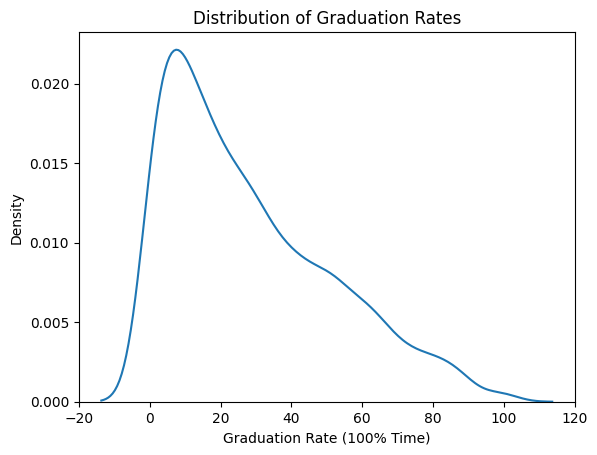

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


In [19]:
import seaborn as sns

df["grad_100_value"] = pd.to_numeric(
    df["grad_100_value"],
    errors="coerce"
)

df["grad_100_value"].dtype

sns.kdeplot(df["grad_100_value"].dropna())
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Distribution of Graduation Rates")
plt.show()

df["grad_100_value"].describe()

Institutions have lower graduation rates within 100% of expected time. Very high graduation rates are less common, and only a small number of institutions reach the highest levels.

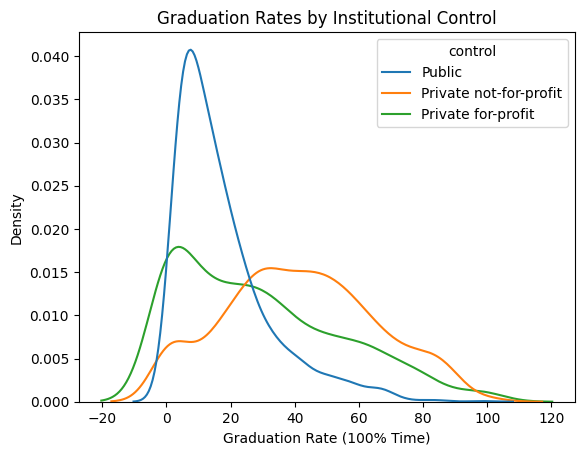

,count,mean,std,min,25%,50%,75%,max
control,,,,,,,,
Private for-profit,779.0,29.108858,25.601687,0.0,6.95,24.7,46.75,100.0
Private not-for-profit,1189.0,41.660976,23.551231,0.0,25.00,41.0,58.30,100.0
Public,1499.0,17.430887,14.729443,0.0,6.90,13.2,23.25,97.8


In [20]:
sns.kdeplot(data=df, x="grad_100_value", hue="control", common_norm=False)
plt.xlabel("Graduation Rate (100% Time)")
plt.title("Graduation Rates by Institutional Control")
plt.show()
df.groupby("control")["grad_100_value"].describe()


Private non-profit institutions tend to have higher graduation rates. Public institutions generally fall in the middle, while private for-profit institutions have the lowest graduation rates.

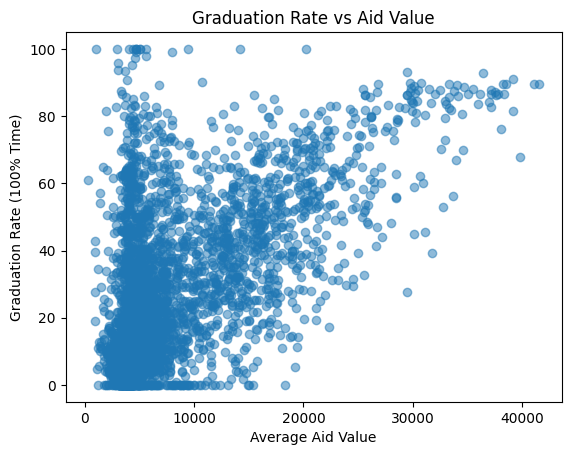

(np.float64(88610.48316902411), np.float64(0.5758792845936064))

In [22]:
import matplotlib.pyplot as plt

df["aid_value"] = pd.to_numeric(
    df["aid_value"],
    errors="coerce"
)

plt.scatter(df["aid_value"], df["grad_100_value"], alpha=0.5)
plt.xlabel("Average Aid Value")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs Aid Value")
plt.show()

cov = df[["aid_value", "grad_100_value"]].cov().iloc[0,1]
corr = df[["aid_value", "grad_100_value"]].corr().iloc[0,1]

cov, corr


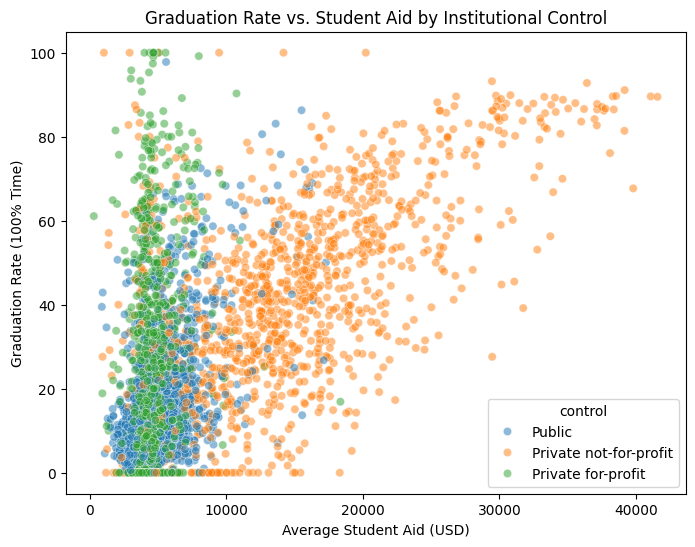

,,grad_100_value
control,,
Private for-profit,aid_value,0.188363
Private not-for-profit,aid_value,0.601591
Public,aid_value,0.482481


In [24]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x='aid_value',
    y='grad_100_value',
    hue='control',
    alpha=0.5
)
plt.xlabel("Average Student Aid (USD)")
plt.ylabel("Graduation Rate (100% Time)")
plt.title("Graduation Rate vs. Student Aid by Institutional Control")
plt.show()

df.groupby('control')[['aid_value', 'grad_100_value']].corr().iloc[0::2,1]



This scatterplot represents the relationship between average student aid and graduation rates by institutional control. Private not-for-profit institutions display a relationship that schools that provide more aid tend to have higher graduation rates.

**Q6.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

We're going to look at **linear transformations** of $X$, $Y = a + bX$. So we take each value of $X$, $x_i$, and transform it as $y_i = a + b x_i$.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $ \text{cov}(X,X) = s^2$.
3. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
4. Show that $\text{cov}(a+bX,a+bY) = b^2 \text{cov}(X,Y) $. Notice, this also means that $\text{cov}(bX, bX) = b^2 s^2$.
5. Suppose $b>0$ and let the median of $X$ be $\text{med}(X)$. Is it true that the median of $a+bX$ is equal to $a + b \times \text{med}(X)$? Is the IQR of $a + bX$ equal to $a + b \times \text{IQR}(X)$?
6. Show by example that the means of $X^2$ and $\sqrt{X}$ are generally not $(m(X))^2$ and $\sqrt{m(X)}$. So, the results we derived above really depend on the linearity of the transformation $Y = a + bX$, and transformations like $Y = X^2$ or $Y = \sqrt{X}$ will not behave in a similar way.

Question 6: https://docs.google.com/document/d/1VlBC1Y7BHqycDvFcCyFrveHhbgCEsUdZts_DVY5lrA0/edit?usp=sharing

**Q7.** This question provides some practice doing exploratory data analysis and visualization.

We'll use the `ames_prices.csv` dataset. The "relevant" variables for this question are:
  - `price` - Sale price value of the house
  - `Bldg.Type` - Building type of the house (single family home, end-of-unit townhome, duplex, interior townhome, two-family conversion)

1. Load the `college_completion.csv` data with Pandas.
2. Make a kernel density plot of price and compute a describe table. Now, make a kernel density plot of price conditional on building type, and use `.groupby()` to make a describe type for each type of building. Which building types are the most expensive, on average? Which have the highest variance in transaction prices?
3. Make an ECDF plot of price, and compute the sample minimum, .25 quantile, median, .75 quantile, and sample maximum (i.e. a 5-number summary).
4. Make a boxplot of price. Are there outliers? Make a boxplot of price conditional on building type. What patterns do you see?
5. Make a dummy variable indicating that an observation is an outlier.
6. Winsorize the price variable, and compute a new kernel density plot and describe table. How do the results change?

In [25]:
import urllib.request
import os
import zipfile
import os

def download_data(force=False):
    """Download and extract course data from Zenodo."""

    zip_path = 'data.zip'
    data_dir = './data'

    if not os.path.exists(zip_path) or force:
        print("Downloading course data...")
        urllib.request.urlretrieve(
            'https://zenodo.org/records/18235955/files/data.zip?download=1',
            zip_path
        )
        print("Download complete")

    if not os.path.exists(data_dir) or force:
        print("Extracting data files...")
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(data_dir)
        print("Data extracted")

    return data_dir


if __name__ == "__main__":
    download_data()


Download complete
Extracting data files...
Data extracted


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/ames_prices.csv")
df.head()


,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
2,3,526351010,1329,172000,20,RL,81.0,14267,Pave,NaN,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
3,4,526353030,2110,244000,20,RL,93.0,11160,Pave,NaN,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
4,5,527105010,1629,189900,60,RL,74.0,13830,Pave,NaN,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [27]:
df.shape


(2930, 82)

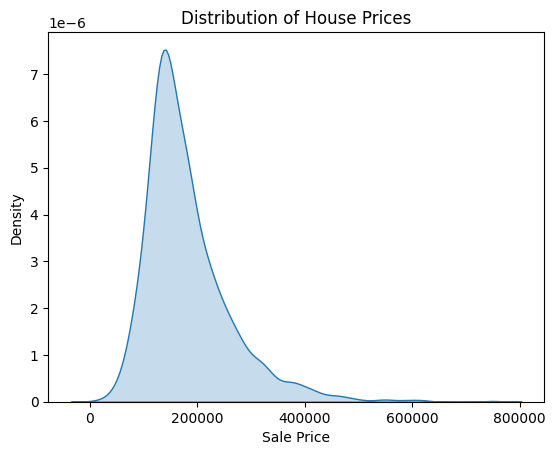

,price
count,2930.000000
mean,180796.060068
std,79886.692357
min,12789.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,755000.000000


In [28]:
sns.kdeplot(df["price"], fill=True)
plt.xlabel("Sale Price")
plt.title("Distribution of House Prices")
plt.show()

df["price"].describe()


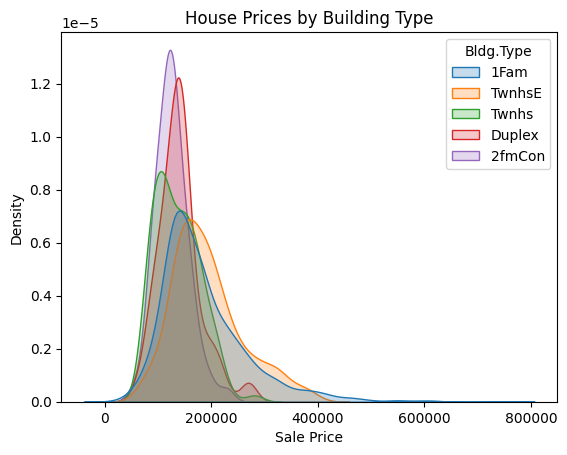

In [29]:
sns.kdeplot(
    data=df,
    x="price",
    hue="Bldg.Type",
    fill=True,
    common_norm=False
)
plt.xlabel("Sale Price")
plt.title("House Prices by Building Type")
plt.show()


In [30]:
df.groupby("Bldg.Type")["price"].describe()


,count,mean,std,min,25%,50%,75%,max
Bldg.Type,,,,,,,,
1Fam,2425.0,184812.041237,82821.802329,12789.0,130000.0,165000.0,220000.0,755000.0
2fmCon,62.0,125581.709677,31089.239840,55000.0,106562.5,122250.0,140000.0,228950.0
Duplex,109.0,139808.935780,39498.973534,61500.0,118858.0,136905.0,153337.0,269500.0
Twnhs,101.0,135934.059406,41938.931130,73000.0,100500.0,130000.0,170000.0,280750.0
TwnhsE,233.0,192311.914163,66191.738021,71000.0,145000.0,180000.0,222000.0,392500.0


The most expensive units on average are single family homes. And, the homes with the highest variance are single-family homes. Additionally, other housing options like townhomes and duplexes are generally cheaper.

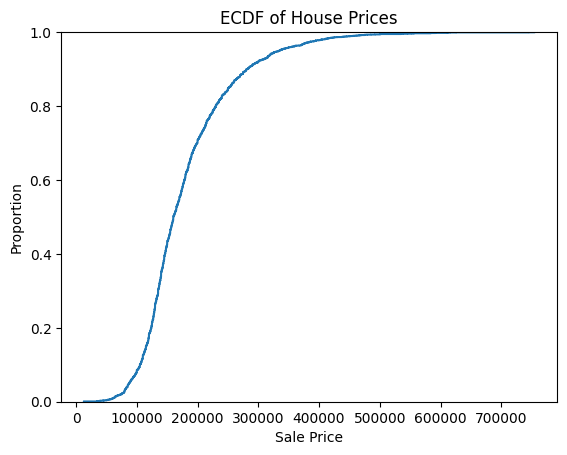

In [31]:
sns.ecdfplot(df["price"])
plt.xlabel("Sale Price")
plt.title("ECDF of House Prices")
plt.show()


In [32]:
df["price"].quantile([0, 0.25, 0.5, 0.75, 1])


,price
0.00,12789.0
0.25,129500.0
0.50,160000.0
0.75,213500.0
1.00,755000.0


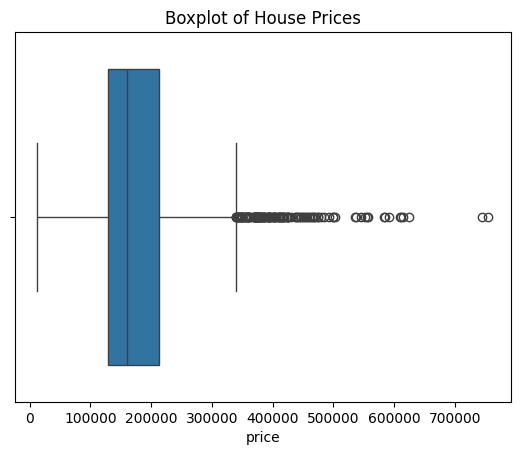

In [33]:
sns.boxplot(x=df["price"])
plt.title("Boxplot of House Prices")
plt.show()


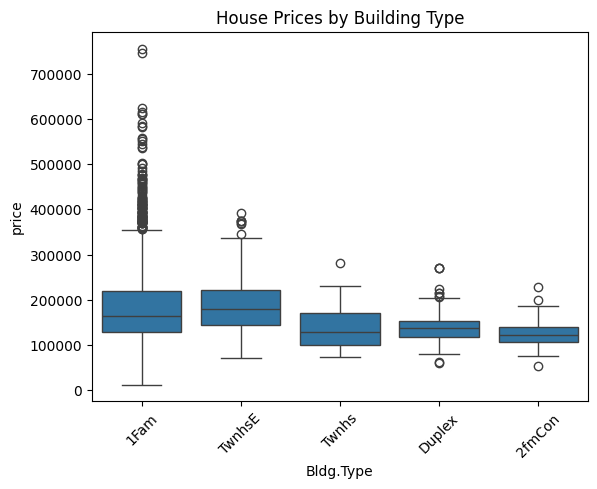

In [34]:
sns.boxplot(data=df, x="Bldg.Type", y="price")
plt.xticks(rotation=45)
plt.title("House Prices by Building Type")
plt.show()


The boxplot shows outliers at the high end of the price distribution. Single-family homes show both higher medians and more extreme outliers compared to other building types.

In [36]:
Q1 = df["price"].quantile(0.25)
Q3 = df["price"].quantile(0.75)
IQR = Q3 - Q1

df["price_outlier"] = (
    (df["price"] < Q1 - 1.5 * IQR) |
    (df["price"] > Q3 + 1.5 * IQR)
)


In [37]:
df["price_outlier"].value_counts()


,count
price_outlier,
False,2793
True,137


In [38]:
lower = df["price"].quantile(0.05)
upper = df["price"].quantile(0.95)

df["price_winsorized"] = df["price"].clip(lower, upper)


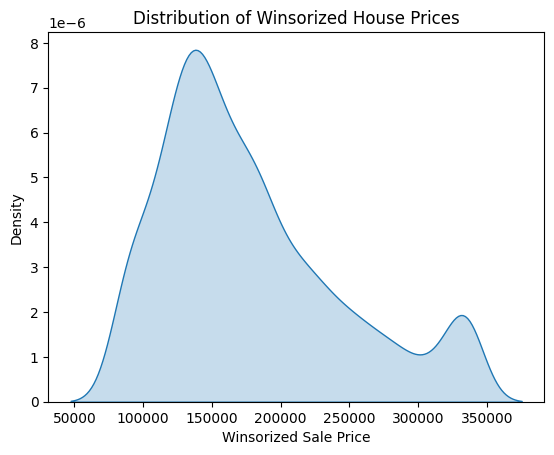

In [39]:
sns.kdeplot(df["price_winsorized"], fill=True)
plt.xlabel("Winsorized Sale Price")
plt.title("Distribution of Winsorized House Prices")
plt.show()


In [40]:
df["price_winsorized"].describe()


,price_winsorized
count,2930.000000
mean,177632.528669
std,66195.453960
min,87500.000000
25%,129500.000000
50%,160000.000000
75%,213500.000000
max,335000.000000


Winsorizing makes the price distribution less extreme by reducing the effect of very expensive houses, without changing the overall pattern much.